<a href="https://colab.research.google.com/github/ttb-git/berkeley-engr-assignment1/blob/main/try_it_10_1_starter_TB_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##Analysing time series for Sunpots data

In [16]:
sunspots = sm.datasets.sunspots.load_pandas()

In [17]:
sunspots = sunspots['data']
sunspots.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [18]:
# Inspecting the "YEAR" column
sunspots['YEAR']

0      1700.0
1      1701.0
2      1702.0
3      1703.0
4      1704.0
        ...  
304    2004.0
305    2005.0
306    2006.0
307    2007.0
308    2008.0
Name: YEAR, Length: 309, dtype: float64

In [19]:
sunspots.index = pd.Index(pd.date_range("1700", "2009", freq="A-DEC"))
sunspots.head()

,YEAR,SUNACTIVITY
1700-12-31,1700.0,5.0
1701-12-31,1701.0,11.0
1702-12-31,1702.0,16.0
1703-12-31,1703.0,23.0
1704-12-31,1704.0,36.0


In [20]:
# Dropping the "YEAR"
sunspots = sunspots.drop('YEAR', axis=1)
sunspots.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


In [21]:
# Plotting x="YEAR", Y="SUNACTIVITY" using Seaborn
import seaborn as sns

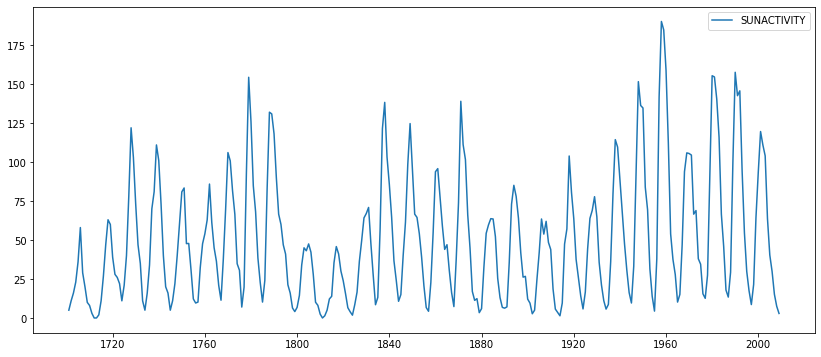

In [22]:
plt.figure(figsize=(14,6))
sns.lineplot(data=sunspots)

###Next, performing atocorrelation on 'sunspots'

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, 'Sunspots Autocorrelation')

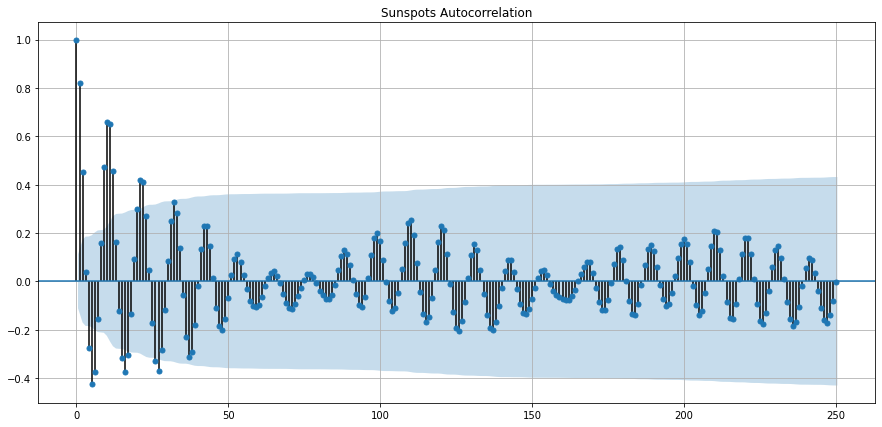

In [24]:
fig, ax = plt.subplots(figsize = (15, 7))
plot_acf(sunspots, ax = ax, lags=250)
ax.grid()
plt.title('Sunspots Autocorrelation')

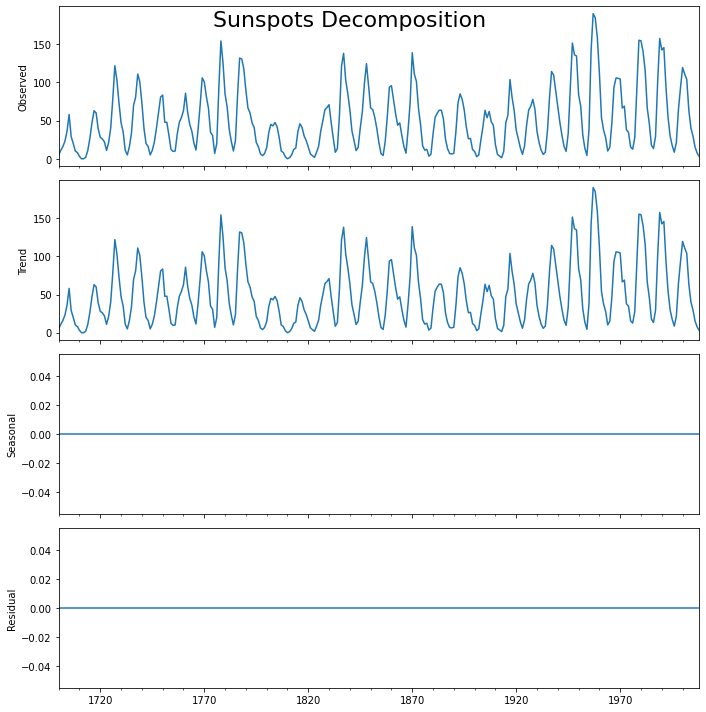

In [57]:
from pandas._libs.tslibs import period
# Decomposing
sunspots_decomp = seasonal_decompose(sunspots)
sunspots_decomp.plot().suptitle('Sunspots Decomposition', fontsize=22)
plt.show()

In [28]:
# Reading the "AirPassengers" csv
airlinep = pd.read_csv('/content/AirPassengers.csv')


In [219]:
airlinep.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [29]:
airlinep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [31]:
airlinep['Month'] = pd.to_datetime(airlinep['Month'])
airlinep.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [32]:
airlinep = airlinep.set_index('Month')

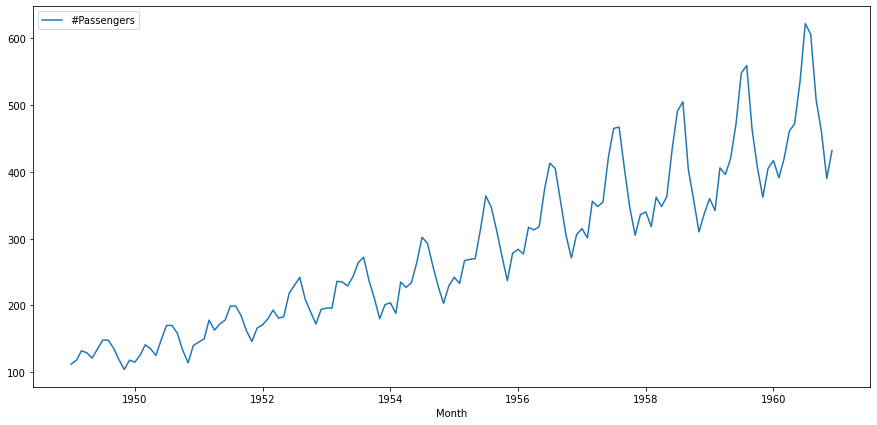

In [33]:
plt.figure(figsize=(15,7))
sns.lineplot(data=airlinep)

Text(0.5, 1.0, 'Airline Passengers Autocorrelation')

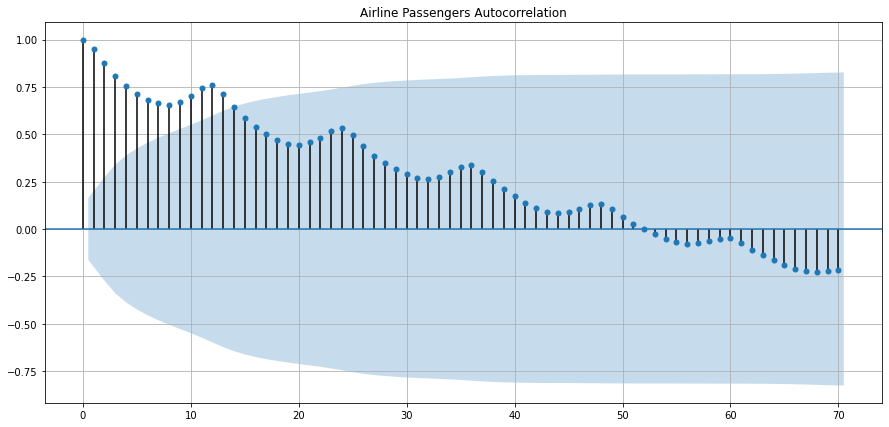

In [34]:
# Next, I perform autocorrelation
fig, ax = plt.subplots(figsize = (15, 7))
plot_acf(airlinep, ax = ax, lags=70)
ax.grid()
plt.title('Airline Passengers Autocorrelation')

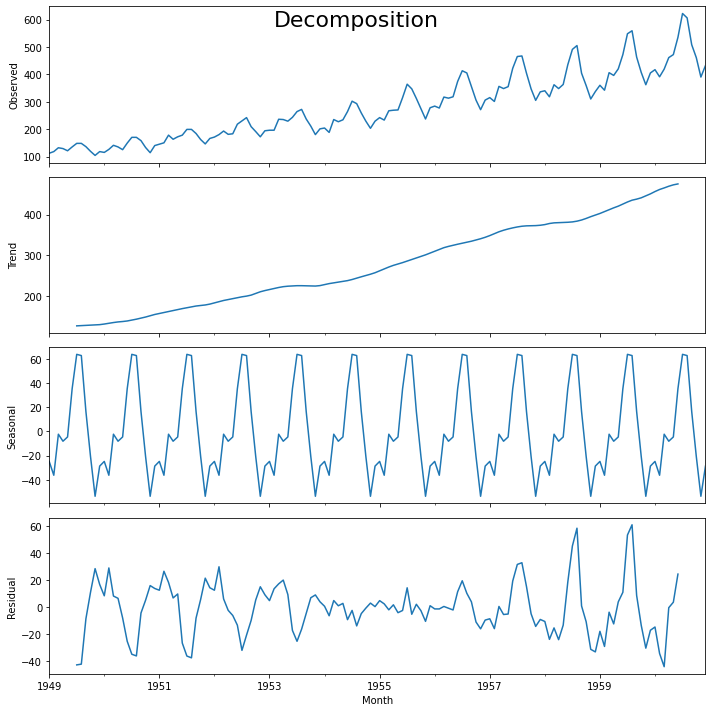

In [48]:
airlinep_decomp = seasonal_decompose(airlinep)
plt.rcParams.update({'figure.figsize': (10,10)})
airlinep_decomp.plot().suptitle('Decomposition', fontsize=22)
plt.show();

Text(0.5, 0.98, 'Multiplicative Decompose')

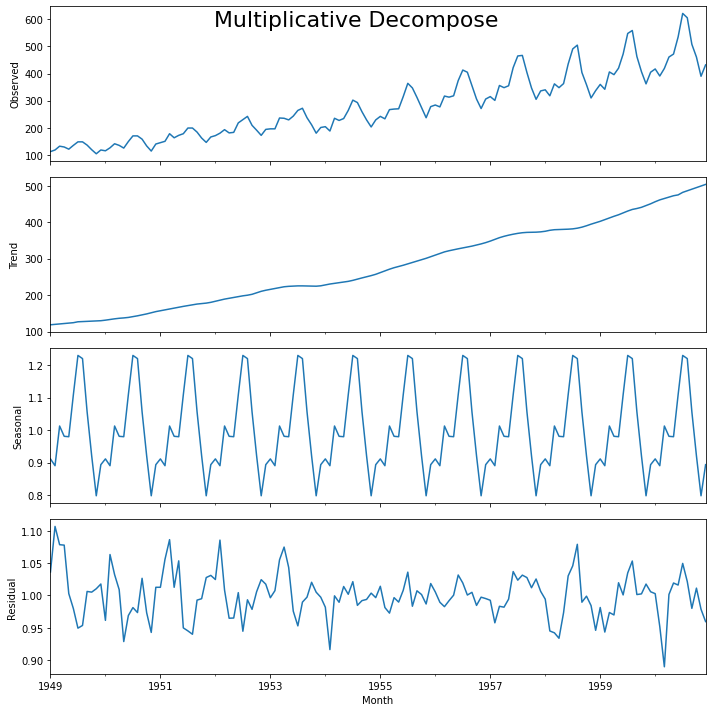

In [44]:
# Multiplicative Decomposition
airlinep_decomp = seasonal_decompose(airlinep, model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
airlinep_decomp.plot().suptitle('Multiplicative Decompose', fontsize=22)

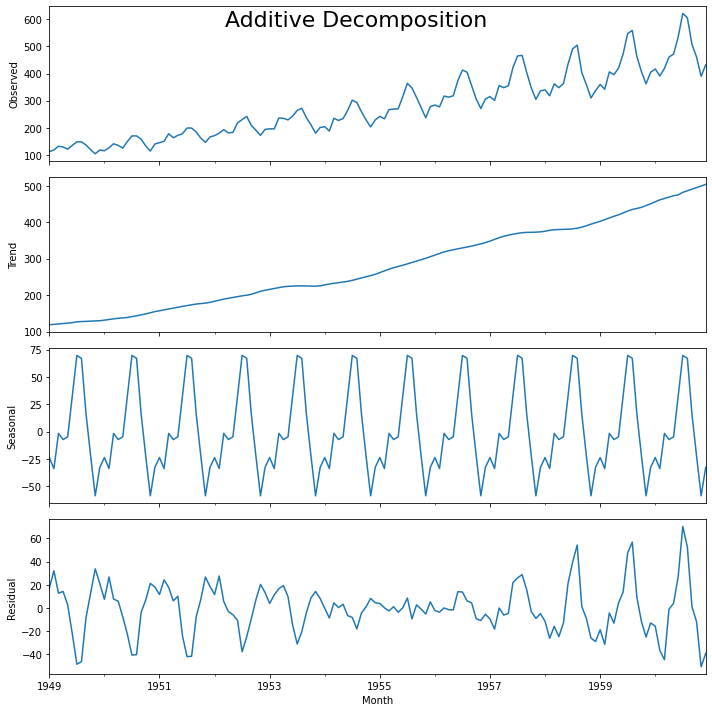

In [45]:
# Additive Decomposition
result_add = seasonal_decompose(airlinep, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()